- ### Documents used:
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    

In [1]:
from sklearn.linear_model  import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
import pandas as pd
import numpy as np

In [2]:
#Get data 
# Read in the data
dataset = "partial_database.csv"
df = pd.read_csv(dataset)


"""
# Decomment this part if you dont have the labels in the csv file
# Read class labels
f = open("labelsDefault.txt", "r")
labels=f.read().splitlines()
labels.pop(0)

# Add y column, which is the target variable
df['y'] = list(map(int,labels))
"""
# Get X and y
Y=df['y']
X=df.drop(['y'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
numbers_of_classes=np.unique(Y)

In [3]:
"""##Optimize hyperparameters
# Create a pipeline
pipe = make_pipeline(StandardScaler(),
                     SGDClassifier())

# Create a parameter grid, where the key is the hyperparameter and the value is a list of values to test
param_grid = {'sgdclassifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
                'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                'sgdclassifier__max_iter': [1000, 5000, 10000, 20000],
                'sgdclassifier__tol': [1e-3, 1e-4, 1e-5]}

# Instantiate random search cv
random_search = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=5)

# Fit random search
random_search.fit(X_train, y_train)

# Show best hyperparameters
print(random_search.best_params_)

#{'sgdclassifier__tol': 0.001, 'sgdclassifier__penalty': 'elasticnet', 'sgdclassifier__max_iter': 20000, 
#'sgdclassifier__loss': 'hinge', 'sgdclassifier__alpha': 0.001}
"""

"##Optimize hyperparameters\n# Create a pipeline\npipe = make_pipeline(StandardScaler(),\n                     SGDClassifier())\n\n# Create a parameter grid, where the key is the hyperparameter and the value is a list of values to test\nparam_grid = {'sgdclassifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],\n                'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],\n                'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1],\n                'sgdclassifier__max_iter': [1000, 5000, 10000, 20000],\n                'sgdclassifier__tol': [1e-3, 1e-4, 1e-5]}\n\n# Instantiate random search cv\nrandom_search = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=5)\n\n# Fit random search\nrandom_search.fit(X_train, y_train)\n\n# Show best hyperparameters\nprint(random_search.best_params_)\n\n#{'sgdclassifier__tol': 0.001, 'sgdclassifier__penalty': 'elasticnet', 'sgdclassifier__max_iter': 20000, \n#'sgdclassifier__loss': 'hinge', 'sgdclassifi

Fold  0
accuracy_score on fold  0.5513833992094862
accuracy_score on all:  0.4673913043478261
Fold  1
accuracy_score on fold  0.5454545454545454
accuracy_score on all:  0.48695652173913045
Fold  2
accuracy_score on fold  0.48023715415019763
accuracy_score on all:  0.4490118577075099
Fold  3
accuracy_score on fold  0.5434782608695652
accuracy_score on all:  0.5258893280632411
Fold  4
accuracy_score on fold  0.5217391304347826
accuracy_score on all:  0.5110671936758894
Fold  5
accuracy_score on fold  0.4407114624505929
accuracy_score on all:  0.46778656126482215
Fold  6
accuracy_score on fold  0.49407114624505927
accuracy_score on all:  0.5430830039525691
Fold  7
accuracy_score on fold  0.4762845849802372
accuracy_score on all:  0.5440711462450593
Fold  8
accuracy_score on fold  0.45849802371541504
accuracy_score on all:  0.5274703557312252
Fold  9
accuracy_score on fold  0.44466403162055335
accuracy_score on all:  0.5616600790513834


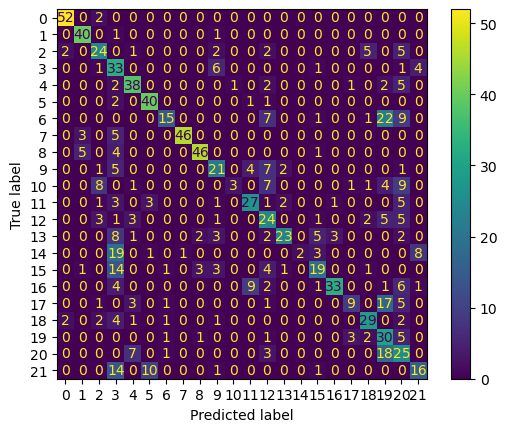

In [4]:
##Split by data, to increment by data:
#{'sgdclassifier__tol': 0.001, 'sgdclassifier__penalty': 'elasticnet', 'sgdclassifier__max_iter': 20000, 
#'sgdclassifier__loss': 'hinge', 'sgdclassifier__alpha': 0.001}

#Model used: SGDClassifier
model = SGDClassifier(max_iter=20000, tol=1e-3,penalty='elasticnet',loss='hinge',alpha=0.001)
number_of_classes = np.linspace(1,22,22)

skf=StratifiedKFold(n_splits=10,shuffle=False)
skf.get_n_splits(X, Y)
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
     print("Fold ",i)
     df_train_fold=df.iloc[train_index]
     X_train_fold=df_train_fold.drop(['y'],axis=1)
     Y_train_fold=df_train_fold['y']

     df_test_fold=df.iloc[test_index]
     X_test_fold=df_test_fold.drop(['y'],axis=1)
     Y_test_fold=df_test_fold['y']

     model.partial_fit(X_train_fold, Y_train_fold, classes=number_of_classes)
     print("accuracy_score on fold ",accuracy_score(Y_test_fold, model.predict(X_test_fold)))
     print("accuracy_score on all: ",accuracy_score(Y, model.predict(X)))

y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [5]:
##Split by class, to increment by class:
#Get dataframe of class 1,2,3,4,5,6,7
df1=df.loc[df['y'].isin([1,2,3,4,5,6,7])]
Y1=df1['y']
X1=df1.drop(['y'],axis=1)

#Get dataframe of class 8,9,10
df2=df.loc[df['y'].isin([8,9,10])]
Y2=df2['y']
X2=df2.drop(['y'],axis=1)

#Get dataframe of class 11,12,13
df3=df.loc[df['y'].isin([11,12,13])]
Y3=df3['y']
X3=df3.drop(['y'],axis=1)

#Get dataframe of class 14,15,16
df4=df.loc[df['y'].isin([14,15,16])]
Y4=df4['y']
X4=df4.drop(['y'],axis=1)

#Get dataframe of class 17,18,19
df5=df.loc[df['y'].isin([17,18,19])]
Y5=df5['y']
X5=df5.drop(['y'],axis=1)

#Get dataframe of class 20,21,22
df6=df.loc[df['y'].isin([20,21,22])]
Y6=df6['y']
X6=df6.drop(['y'],axis=1)

#Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=1, shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1, shuffle=True)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=1, shuffle=True)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=1, shuffle=True)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size=0.2, random_state=1, shuffle=True)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, Y6, test_size=0.2, random_state=1, shuffle=True)


accuracy_score for class 1,2,3,4,5,6,7:  0.8136645962732919
accuracy_score for all classes:  0.28063241106719367
accuracy_score for class 8,9,10:  0.9637681159420289
accuracy_score for all classes:  0.18379446640316205
accuracy_score for class 11,12,13:  0.8260869565217391
accuracy_score for all classes:  0.14723320158102768
accuracy_score for class 14,15,16:  0.7681159420289855
accuracy_score for all classes:  0.14624505928853754
accuracy_score for class 17,18,19:  0.9782608695652174
accuracy_score for all classes:  0.16205533596837945
accuracy_score for class 20,21,22:  0.8188405797101449
accuracy_score for all classes:  0.1551383399209486


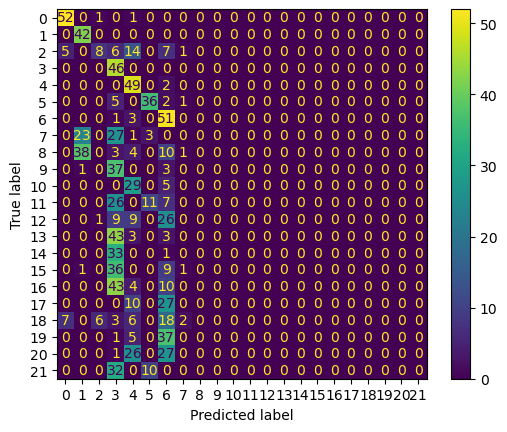

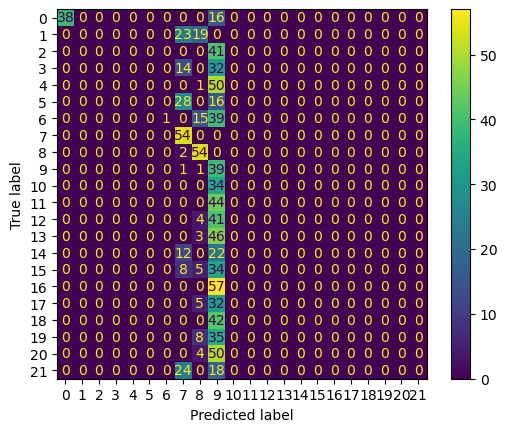

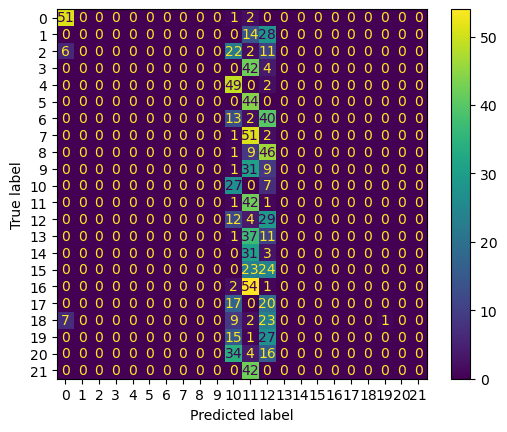

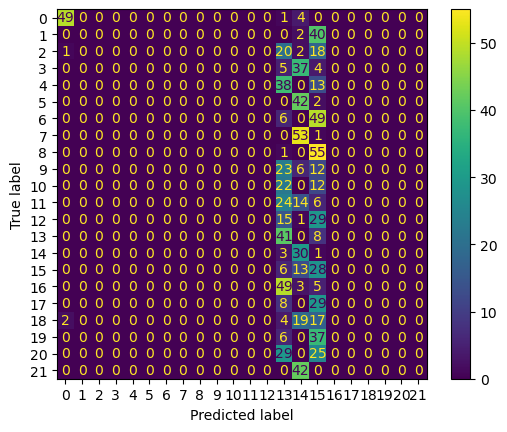

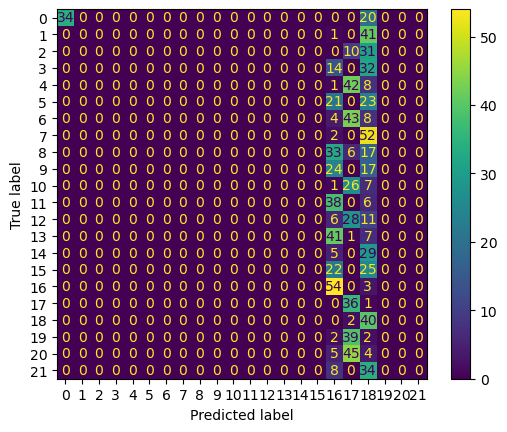

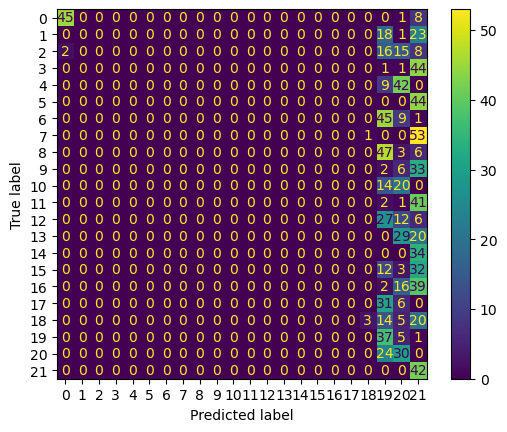

In [7]:
##Incremental learning by class:

#Model used: SGDClassifier
model = SGDClassifier(max_iter=20000, tol=1e-3,penalty='elasticnet',loss='hinge',alpha=0.001)
number_of_classes = np.linspace(1,22,22)

#Fit the model
model.partial_fit(X_train1, y_train1, classes=number_of_classes)
print("accuracy_score for class 1,2,3,4,5,6,7: ",accuracy_score(y_test1, model.predict(X_test1)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.partial_fit(X_train2, y_train2, classes=number_of_classes)
print("accuracy_score for class 8,9,10: ",accuracy_score(y_test2, model.predict(X_test2)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.partial_fit(X_train3, y_train3, classes=number_of_classes)
print("accuracy_score for class 11,12,13: ",accuracy_score(y_test3, model.predict(X_test3)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.partial_fit(X_train4, y_train4,classes=number_of_classes)
print("accuracy_score for class 14,15,16: ",accuracy_score(y_test4, model.predict(X_test4)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.partial_fit(X_train5, y_train5, classes=number_of_classes)
print("accuracy_score for class 17,18,19: ",accuracy_score(y_test5, model.predict(X_test5)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.partial_fit(X_train6, y_train6,classes=number_of_classes)
print("accuracy_score for class 20,21,22: ",accuracy_score(y_test6, model.predict(X_test6)))
print("accuracy_score for all classes: ",accuracy_score(y_test, model.predict(X_test)))

cm = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
